In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
from skimage.metrics import structural_similarity as ssim

In [2]:
mat_contents = scipy.io.loadmat('./allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

In [5]:
#swapping rows and columns, because for some reason they are inverted in the data set
faces = faces.T

print('faces ', faces.shape)
print(m)
print(n)
print(m*n)

faces  (2410, 32256)
168
192
32256


(-0.5, 167.5, 191.5, -0.5)

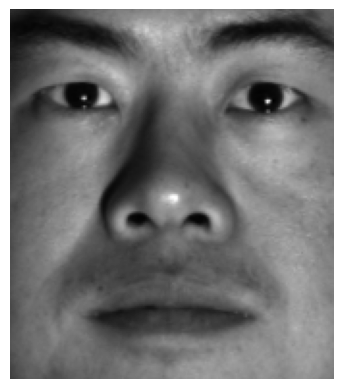

In [4]:
img = plt.imshow(faces[100].reshape(m,n).T)
img.set_cmap('gray')
plt.axis('off')

In [ ]:
faces_train = faces[:np.sum(nfaces[:38]),:]
avg_face = np.mean(faces_train, axis = 0)
#setting mean 0 for training faces
X = faces_train - np.tile(avg_face, (faces_train.shape[0], 1))

2410


In [6]:
u,s,vt = np.linalg.svd(X, full_matrices = 0)

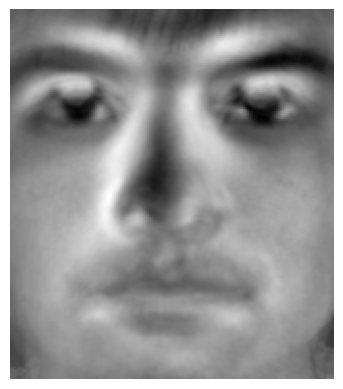

In [7]:
#getting the first autofaces
img = plt.imshow(faces[0].reshape(m,n).T)
img.set_cmap('gray')
plt.axis('off')

v = vt.T
face_minus_avg = faces[0] - avg_face
for r in range(9):
    img = plt.imshow(v[:,r].reshape(m,n).T)
    img.set_cmap('gray')
    plt.axis('off')
    plt.savefig(f'relazione/immagini/eigenface_{r}', dpi = 400)

In [8]:
image = Image.open("liam_face2.png")

liam_face = np.array(image)
liam_face = liam_face[:,:,0]

#the orientation is wrong
liam_face = liam_face.T
liam_face = liam_face.flatten()

#lady is the name of the dog
image = Image.open("lady_face.png")
lady_face = np.array(image)

#the orientation is wrong
lady_face = lady_face.T
lady_face = lady_face.flatten()

#lady is the name of the dog
image = Image.open("plant.png")
plant = np.array(image)

#the orientation is wrong
plant = plant.T
plant = plant.flatten()

In [9]:
def project_face(face, avg_face, v, r_list, face_name):

    #saving original image
    plt.imshow(np.reshape(face,(m,n)).T)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.title('immagine originale')
    plt.savefig(f'relazione/immagini/{face_name}_faccia_originale.png')

    #removing avg, because model is trained on avg = 0
    face_minus_avg = face - avg_face
    
    #list of sums of (original image pixels -  projected image pixels)**2
    msqe = []
    #list of structural similarity indices
    ssi = []

    for r in r_list:
        proj_face = avg_face + (face_minus_avg@v[:,:r])@v[:,:r].T

        #saving image
        img = plt.imshow(proj_face.reshape(m,n).T)
        img.set_cmap('gray')
        plt.title(f'r = {r}')
        plt.axis('off')
        plt.savefig(f'relazione/immagini/{face_name}_faccia_{r}.png')

        #calculating info loss through msqe
        msqe.append(np.sum((face - proj_face)**2)/(face.size-1))

        #calculating info loss through ssim
        min_range = min(face.min(),proj_face.min())
        max_range = max(face.max(),proj_face.max())
        ssi.append(ssim(face, proj_face, data_range=max_range  - min_range))

    return msqe, ssi



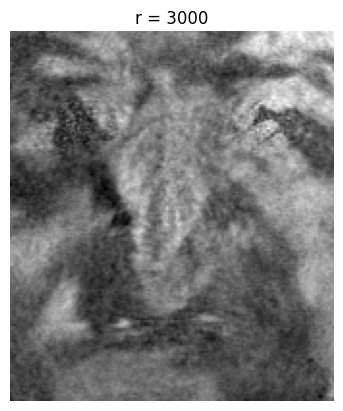

In [10]:
v = vt.T
r_list = [25, 100, 150, 300, 500, 700, 1000, 2000, 3000]
msqe_liam, ssi_liam = project_face(liam_face, avg_face, v, r_list, 'liam')
msqe_lady, ssi_lady = project_face(lady_face, avg_face, v, r_list, 'lady')
msqe_plant, ssi_plant = project_face(plant, avg_face, v, r_list, 'plant')

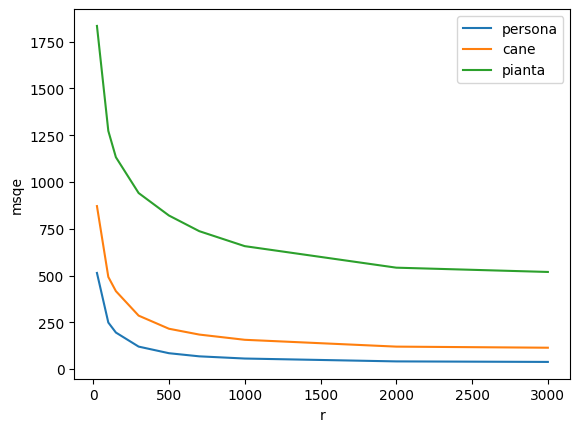

In [11]:
fig, ax = plt.subplots()
ax.plot(r_list, msqe_liam, label = 'persona')
ax.plot(r_list, msqe_lady, label = 'cane')
ax.plot(r_list, msqe_plant, label = 'pianta')
plt.legend()
plt.xlabel('r')
plt.ylabel('msqe')
plt.savefig('relazione/immagini/msqe.png', dpi = 400)

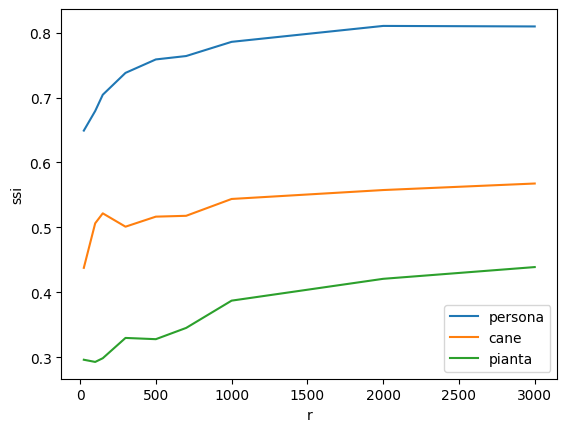

In [12]:
fig, ax = plt.subplots()
ax.plot(r_list, ssi_liam, label = 'persona')
ax.plot(r_list, ssi_lady, label = 'cane')
ax.plot(r_list, ssi_plant, label = 'pianta')
plt.xlabel('r')
plt.ylabel('ssi')
plt.legend()
plt.savefig('relazione/immagini/ssi.png', dpi = 400)